In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

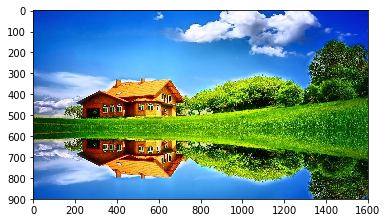

In [2]:
im = cv2.imread('./image.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#r, c = im.shape[:2]
#out_r = 240
#im = cv2.resize(im, (int(out_r*float(c)/r), out_r))
plt.imshow(im)

In [44]:
K = np.ones((5,5))
K[0,:]=0
K[4,:]=0
K[:,0]=0
K[:,4]=0
K
K/=9
print (K)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.11111111  0.11111111  0.11111111  0.        ]
 [ 0.          0.11111111  0.11111111  0.11111111  0.        ]
 [ 0.          0.11111111  0.11111111  0.11111111  0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [4]:
im.shape

(900, 1600, 3)

In [5]:
print(im[0,0])

[  2  51 188]


In [45]:
outr=im.shape[0]-K.shape[0]+1

outc=im.shape[1]-K.shape[1]+1

X=np.zeros((outr,outc,3))

print(X.shape)

(896, 1596, 3)


In [46]:
temp=[]
for i in range(outr):
    for j in range(outc):
        for g in range(3):
            patch=im[i:(K.shape[0]+i),j:(K.shape[1]+j),g]
            prod=patch*K
            X[i,j,g]=int(prod.sum())

In [57]:
print(X[0])

[[ 251.  202.   65.]
 [ 251.  202.   65.]
 [ 250.  202.   64.]
 ..., 
 [ 251.  228.   64.]
 [ 251.  228.   64.]
 [ 252.  229.   65.]]


In [47]:
X=255-X

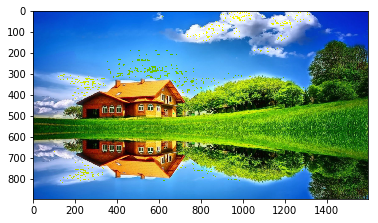

In [48]:
#X=X*(X>0)
plt.imshow(X)